# Situación Problema

- TC2035: Curso Diseño de redes neuronales y aprendizaje profundo
- Grupo: 2
- Profesor: Jorge Mario Cruz Duarte

> - Ian Timothy Henry Suárez | A01701578
> - Roel Adrián De la Rosa Castillo | A01197595

## Introducción

El aprendizaje profundo o 'deep learning' es una forma de aprendizaje automático o 'machine learning'. Este tipo de aprendizaje automático es implementado por medio de redes neuronales artificiales, y es la base de la inteligencia artificial. El objetivo del aprendizaje profundo consiste en simular la inteligencia humana, y de esta forma poder realizar ciertas tareas como el reconocimiento de imágenes, reconocimiento de lenguaje natural, entre otras. Con el tiempo, se han descubierto nuevos tipos y arquitecturas de redes neuronales que son más apropiadas para ciertos tipos de tareas. En los ultimos años, se ha demostrado que las redes neuronales convolucionales tienen un buen desempeño identificando imágenes. 

El objetivo de este proyecto consiste en implementar modelos capaces de reconocer imágenes de prendas de ropa y clasificarlas en la categoría a la que corresponden. Para poder hacer esto, se utilizará la base de datos Fashion-MNIST diponible en Tensorflow (https://www.tensorflow.org/datasets/catalog/fashion_mnist) y en GitHub (https://github.com/zalandoresearch/fashion-mnist). Esta base de datos cuenta con 60,000 registros de entrenamiento y 10,000 registros de validación. Cada registro consiste en una imágen en blanco y negro de 28 x 28 pixeles asosiada a su etiqueta, que hace referencia a una de las 10 posibles prendas. En este proyecto se implementarán 4 diferentes modelos para resolver el problema y se compararán los resultados. 

## Procesamiento de datos

In [52]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.layers import Dense, LSTM, Conv2D, MaxPooling2D, Dropout, Flatten, Reshape, Lambda
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from time import time
from tqdm.keras import TqdmCallback
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report
from matplotlib import cm
from colorspacious import cspace_converter

In [53]:
# Creamos una función para mostrar las imágenes
def plot(images, labels, predictions=None):
    """Helper function to plot images, labels and predictions
    Parameters
    ----------
    images : 3D matrix of image
    labels : 1D array
    predictions (optional): 1D array
    """
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = int(np.ceil(len(images) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3,n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(f"lbl: {class_names[y_true]}")
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
            ax.set_xticks([])

            ax.set_yticks([])

In [54]:
# Definimos los datos de entrenamiento y de vaidación
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Establecemos las etiquetas en lenguaje natural
class_names = {i:cn for i, cn in enumerate(
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }

# Reescalamos los datos entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

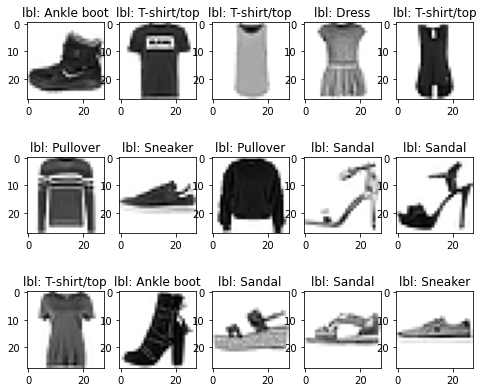

In [55]:
# Mostramos las primeras imágenes
plot(x_train[:15], y_train[:15])

## Modelo 1 - Multilayer Perceptron (MLP) (Roel)

Es uno de los modelos de redes neuronales más básicos. En este tipo de modelos se tiene una capa de entrada, en la cual se ingresan los datos, después se encuentran las capas ocultas, en las que se realizan operaciones matemáticas que permitirán que el modelo aprenda de forma autonoma. Finalmente, se encuentra la capa de salida, en la cual la red neuronal regresa un resultado. En este modelo cada neurona recibe información de un producto punto entre las neuronas de la capa anterior y los pesos que se le asignan a dichas neuronas con las de la nueva capa. Estos pesos se irán actualizando y optimizando a partir del algoritmo de $\textbf{BackPropagation}$. Este algoritmo lo que hace es que, desde la última capa de neuronas, es decir la de salida, detecta cuales neuronas son las que tienen más responsabilidad con la función de pérdida. En nuestro caso la función de pérdida es $\textit{"sparse_categorical_crossentropy"}$. Esto se repite en todas las capas hasta que el modelo detecta cuales son las neuronas con mayor resposabilidad del error. Luego, a partir del método del gradiente descendiente la red neuronal cambia los valores de los pesos de tal forma que se acoplan mejor a nuestro set de datos. Esto se repite múltiples veces hasta que el modelo tiene un error adecuado.<br>

En nuestro caso el modelo tiene 1 capa de entrada, 4 capas ocultas y una capa de salida. La primera capa oculta es una $\textbf{Flatten}$, la cual transforma los datos que tenemos, en este caso imagenes de (28x28) en un arreglo, es decir "aplana" los datos que se tomarán en cuenta. Después se tiene 3 capas ocultas, con 50, 100 y 50 neuronas respectivamente. Finalmente, se encuentra la capa de salida, la cual contiene 10 neuronas, una para cada tipo de prenda que se pretende clasificar.

In [56]:
# Implementación MLP

# Definimos el modelo 
model1 = keras.Sequential()

# Agregamos las capas
model1.add(keras.layers.Flatten(input_shape=(28, 28)))
model1.add(keras.layers.Dense(50, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(50, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

# Compilamos el modelo
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Mostramos las características del modelo
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                39250     
                                                                 
 dense_11 (Dense)            (None, 100)               5100      
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 49,910
Trainable params: 49,910
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Mostramos la estructura de la red
# SVG(model_to_dot(model1, show_shapes= True, show_layer_names=False, dpi=65).create(prog='dot', format='svg'))

In [58]:
# Entrenamos el modelo
start1 = time()
history1 = model1.fit(x_train, y_train, batch_size=90, epochs=30, verbose=0)
fin1 = time()-start1
print(f"Tiempo de entrenamiento: {fin1:.2f} segundos")

Tiempo de entrenamiento: 29.31 segundos


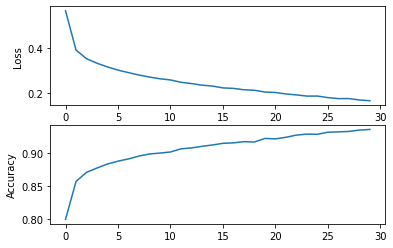

In [59]:
# Mostramos el desempeño del modelo
_, axs = plt.subplots(2, 1)
axs[0].plot(history1.history['loss'])
axs[0].set_ylabel(r"Loss")
axs[1].plot(history1.history['accuracy'])
axs[1].set_ylabel(r"Accuracy")
plt.show()

In [60]:
# Mostramos la precisión del modelo
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy1*100:.2f} %")

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy = 88.73 %


In [61]:
# Mostramos la matriz de confusión
probs1 = model1.predict(x_test)
preds1 = probs1.argmax(axis=1)

pd.crosstab(pd.Series(y_test),
            pd.Series(preds1),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,843,4,16,21,8,3,96,0,9,0,1000
1,0,973,3,16,4,0,3,0,0,1,1000
2,13,0,779,12,107,1,87,0,1,0,1000
3,22,7,19,890,41,1,17,0,3,0,1000
4,1,0,76,23,838,0,60,0,1,1,1000
5,0,0,0,1,0,965,1,24,1,8,1000
6,133,1,58,30,61,0,712,1,4,0,1000
7,0,0,0,0,0,12,0,970,1,17,1000
8,2,0,7,3,7,4,8,5,963,1,1000


## Modelo 2 - Long Short Term Memory (LSTM) (Ian)

Las redes long short term memory (LSTM) son de las redes recurrentes más usadas. Este tipo de redes no solo tiene la caracteristica de memoria a corto plazo de las redes recurrentes, sino que también tiene memoria de largo plazo. Esto se debe a que las redes LSTM pueden guardar, consultar y eliminar nueva información de su memoria. La idea es que no se pierdan patrones importantes a través del tiempo, y que en futuras corridas, la red pueda 'recordar' comportamientos anteriores. La memoria de una red LSTM puede entenderse como un espacio con tres compuertas; una de entrada, una de olvido y otra de salida. Con base en estas compuertas se puede permir o no una nueva entrada de información. También, se determina si se elimina la información que tiene porque no es importante o se mantiene para que pueda afectar los valores de salida. Estas compuertas pueden tomar un valor entre 0 y 1. Esta propiedad permite que las compuertas sean incorporadas en el proceso de backpropagation. Cuando la compuerta toma el valor de 0, se encuentra cerrada por completo, y cuando toma el valor de 1, se encuentra completamente abierta.

La siguiente red neuronal recursiva (RNN) cuenta únicamente con dos capas. La primera capa es una capa tipo 'LSTM' con 30 neuronas. La segunda capa es una capa tipo 'dense' con 10 nodos, que son las categorías de prendas que se tienen.

In [62]:
# Definimos los datos de entrenamiento y de vaidación
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Establecemos las etiquetas en lenguaje natural
class_names = {i:cn for i, cn in enumerate(
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }

# Reescalamos los datos entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [63]:
# Implementación LSTM

# Deshabilitamos la función 'ansiosa'
tf.compat.v1.disable_eager_execution()

# Definimos el modelo
model2 = Sequential()

# Agregamos las capas
model2.add(LSTM(30, input_shape=(28,28)))
model2.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Obtenemos un resúmen
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30)                7080      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
Total params: 7,390
Trainable params: 7,390
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Mostramos la estructura de la red
# SVG(model_to_dot(model2, show_shapes= True, show_layer_names=False, dpi=65).create(prog='dot', format='svg'))

In [65]:
# Entrenamos el modelo
start2 = time()
history2 = model2.fit(x_train, y_train, batch_size=100, epochs=90, verbose=0)
fin2 = time()-start2
print(f"Tiempo de entrenamiento: {fin2:.2f} segundos")

Tiempo de entrenamiento: 405.00 segundos


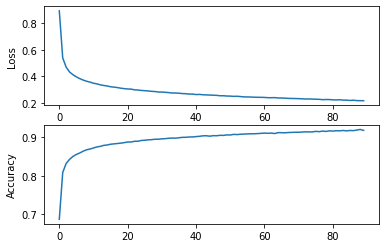

In [66]:
# Mostramos el desempeño del modelo
_, axs = plt.subplots(2, 1)
axs[0].plot(history2.history['loss'])
axs[0].set_ylabel(r"Loss")
axs[1].plot(history2.history['accuracy'])
axs[1].set_ylabel(r"Accuracy")
plt.show()

In [67]:
# Mostramos la presición del modelo
loss2, accuracy2 = model2.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy2*100:.2f} %")


c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy = 87.94 %


In [68]:
# Prediction
probs2 = model2.predict(x_test)
preds2 = probs2.argmax(axis=1)

pd.crosstab(pd.Series(y_test),
            pd.Series(preds2),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,804,1,12,21,2,1,151,0,8,0,1000
1,6,971,2,15,3,0,2,0,1,0,1000
2,15,1,781,15,71,1,112,0,4,0,1000
3,35,14,7,869,33,0,34,0,8,0,1000
4,2,1,88,38,770,2,96,0,3,0,1000
5,1,0,0,1,0,969,0,17,2,10,1000
6,117,1,41,29,60,0,735,0,17,0,1000
7,0,0,0,0,0,16,0,966,0,18,1000
8,7,0,2,5,4,4,3,2,973,0,1000


## Modelo 3 - Convolutional Neural Network (CNN) (Ian)

Este tipo de redes utiliza capas convolucionales para procesar imágenes. Las capas convolucionales sirven para identificar elementos dentro de las imágenes, como lineas o bordes. De esta forma, la red puede procesar la relación que existe entre los valores de los pixeles, en vez de procesar los valores de los pixeles por si solos. Esto significa una gran ventaja, al momento de probar una red neuronal convolucional con valores diferentes que con los que fue entrenada, ésta podrá identificar un objeto en una imágen aunque éste cambie de posición. Las capas convolucionales usan un filtro para llevar a cabo las convoluciones. La dimensión de este filto puede variar. La cantidad de nodos de una capa convolucional, consiste en la cantidad de combinaciones diferentes de los valores del filtro para realizar las convoluciónes. Cada nodo regresa una nueva imágen. Los valores del filtro se ajustarán durante el entrenamiento. Después de la capa convolucional, es conveniente reducir la dimensionalidad de la imágen de cada nodo y perder la menor cantidad de información posible. Para hacer esto se utiliza una capa de agrupación. Dentro de una determinada matriz de pixeles, se guarda únicamente el valor de uno. Este puede ser el valor más alto, el valor promedio, etc. Después de pasar la matriz por toda la imágen, se generará una nueva imágen reducida con los valores obtenidos. Ahora se tiene la misma cantidad de imágenes, pero estas tienen una dimensión menor. Se puede agregar otra capa convolucional con más neuronas para las imágenes reducidas, y una capa de agrupación para reducir las nuevas convoluciones. De esta forma, se pueden seguir agregando pares de capas con cada vez más nodos. Posteriormente, debemos utilizar una capa tipo "flatten" para obtener un solo vector con los datos en lugar de las matrices que se utilizaron en las capas convolucionales. De esta forma, podremos utilizar capas tipo "dense". Es posible, que después del entrenamiento haya algunos pesos con valores muy altos y otros con valores muy bajos. Para hacer que esto no suceda y la red no se vuelva tan rígida, podemos utilizar la función "dropout". Esta función hace que cierto porcentaje de las neuronas se apaguen en cada epoch. De esta forma, permite que todas las neuronas trabajen. 

La siguiente red neuronal convolucional cuenta con dos capas convolucionales seguidas de sus respectivas capas de agrupamiento. Las capas de agrupamiento tienen un "pool" de 2x2. Ambas capas convolucionales tienen un filtro o núcleo de 3x3. La primer capa tiene 32 nodos y la segunda capa tiene 64 nodos. Posteriormente, se implementa un "dropout" y una capa "flatten". Finalmente, se utilizan dos capas tipo "dense", una con 50 nodos y la ultima con 10 nodos, que son las categorías de prendas que se tienen.

In [69]:
# Definimos los datos de entrenamiento y de vaidación
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Establecemos las etiquetas en lenguaje natural
class_names = {i:cn for i, cn in enumerate(
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }

# Reescalamos los datos entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Ajustamos los datos de entrenamiento para los modelos convolucionales 
x_train3 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test3 = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [70]:
# Implementación CNN

# Definimos el modelo
model3 = keras.Sequential()

# Agregamos las capas
model3.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Dropout(0.3))
model3.add(Flatten())

model3.add(Dense(50, activation="relu"))
model3.add(Dense(10, activation="softmax"))

# Compilamos el modelo
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Mostramos un resúmen del modelo
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 1600)             

In [71]:
# Mostramos la estructura de la red
# SVG(model_to_dot(model3, show_shapes= True, show_layer_names=False, dpi=65).create(prog='dot', format='svg'))

In [72]:
# Entrenamos el modelo
start3 = time()
history3 = model3.fit(x_train3, y_train, batch_size=80, epochs=28, verbose=0)
fin3 = time()-start3
print(f"Tiempo de entrenamiento: {fin3:.2f} segundos")

Tiempo de entrenamiento: 426.49 segundos


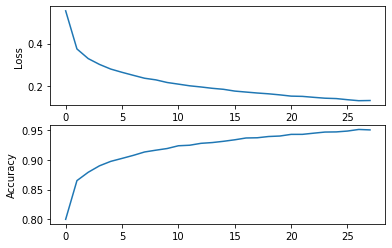

In [73]:
# Mostramos el desempeño del modelo 
_, axs = plt.subplots(2, 1)
axs[0].plot(history3.history['loss'])
axs[0].set_ylabel(r"Loss")
axs[1].plot(history3.history['accuracy'])
axs[1].set_ylabel(r"Accuracy")
plt.show()

In [74]:
# Present the accuracy
loss3, accuracy3 = model3.evaluate(x_test3, y_test)
print(f"Accuracy = {accuracy3*100:.2f} %")

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy = 92.10 %


In [75]:
# Prediction
probs3 = model3.predict(x_test3)
preds3 = probs3.argmax(axis=1)

pd.crosstab(pd.Series(y_test),
            pd.Series(preds3),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,899,0,16,17,2,1,57,0,8,0,1000
1,3,977,2,11,2,0,3,0,2,0,1000
2,17,0,908,8,45,0,21,0,1,0,1000
3,10,3,14,922,26,0,25,0,0,0,1000
4,3,0,39,18,914,0,26,0,0,0,1000
5,0,0,0,0,0,992,0,6,0,2,1000
6,136,0,74,24,83,0,677,0,6,0,1000
7,0,0,0,0,0,8,0,975,0,17,1000
8,2,0,3,6,2,4,0,0,983,0,1000


## Modelo 4 - CNN y LSTM (Roel)

Para este cuarto modelo, lo que se realizó fue una combinación entre los dos modelos anteriores. Se implementó una red neuronal que tiene capas ocultas convolucionales y LSTM. Al momento de implementar este modelo, lo primero que se utilizó fue la arquitectura de una red neuronal convolucional. Este tipo de redes es capaz de encontrar patrones y caracteristicas que dentro de las imágenes con las que se entrena la red. Posteriormente, se utiliza una capa Lambda, la cual permite el uso de funciones lambda para transformar o mapear la información. Dentro de la capa lambda, se implemento una función 'reshape'. Lo que hace esta función es modificar las dimensiónes de los sets de datos que se transfieren de una capa a la siguiente. Después, se implemento la capa LSTM. Esta capa va aprendiendo sobre la información con la que se esta entrenando a partir de un algoritmo recurrente. Finalmente, se llega a la capa de salida, con la cual se realiza la clasificación de los 10 tipos de prendas que el modelo quiere llegar a clasificar.

In [76]:
# Definimos los datos de entrenamiento y de vaidación
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Establecemos las etiquetas en lenguaje natural
class_names = {i:cn for i, cn in enumerate(
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }

# Reescalamos los datos entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Ajustamos los datos de entrenamiento para los modelos convolucionales 
x_train3 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test3 = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [77]:
# Definimos el modelo
model4 = keras.Sequential()

# Agregamos las capas
model4.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))

# Agregamos una capa lambda y reshape para ajustar las dimensiones de las entradas
model4.add(Lambda(lambda x: Reshape((x.shape[1], x.shape[2] * x.shape[3]))(x)))
model4.add(LSTM(16))
model4.add(Dense(10, activation="softmax"))

# Compilamos el modelo
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Mostramos el modelo
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 lambda_1 (Lambda)           (None, 26, 832)           0         
                                                                 
 lstm_3 (LSTM)               (None, 16)                54336     
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
Total params: 54,826
Trainable params: 54,826
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Mostramos la estructura de la red
# SVG(model_to_dot(model4, show_shapes= True, show_layer_names=False, dpi=65).create(prog='dot', format='svg'))

In [79]:
# Entrenamos el modelo
start4 = time()
history4 = model4.fit(x_train3, y_train, batch_size=80, epochs=20, verbose=0)
fin4 = time()-start4
print(f"Tiempo de entrenamiento: {fin4:.2f} segundos")

Tiempo de entrenamiento: 288.05 segundos


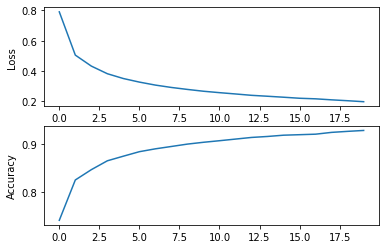

In [80]:
# Mostramos el desempeño del modelo
_, axs = plt.subplots(2, 1)
axs[0].plot(history4.history['loss'])
axs[0].set_ylabel(r"Loss")
axs[1].plot(history4.history['accuracy'])
axs[1].set_ylabel(r"Accuracy")
plt.show()

In [81]:
# Mostramos la presición del modelo
loss4, accuracy4 = model4.evaluate(x_test3, y_test)
print(f"Accuracy = {accuracy4*100:.2f} %")

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy = 90.24 %


In [82]:
# Prediction
probs4 = model4.predict(x_test3)
preds4 = probs4.argmax(axis=1)

pd.crosstab(pd.Series(y_test),
            pd.Series(preds4),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,855,1,20,27,2,1,87,0,7,0,1000
1,1,983,1,12,3,0,0,0,0,0,1000
2,19,2,880,9,45,0,45,0,0,0,1000
3,20,8,15,907,26,0,23,0,1,0,1000
4,1,5,86,25,845,0,38,0,0,0,1000
5,1,0,0,0,0,972,0,17,1,9,1000
6,131,2,71,30,96,0,663,0,7,0,1000
7,0,0,0,0,0,7,0,969,0,24,1000
8,5,2,1,4,3,2,3,2,977,1,1000


## Comparación de resultados

**Comparación**

Accuracy MLP = 88.73 %
Accuracy LSTM = 87.94 %
Accuracy CNN = 92.10 %
Accuracy CNN - LSTM = 90.24 %


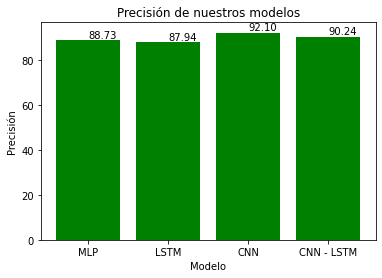

In [83]:
# Presentamos la presición del modelo
values1 = [accuracy1*100, accuracy2*100, accuracy3*100, accuracy4*100]
models1 = ['MLP', 'LSTM', 'CNN', 'CNN - LSTM']

for index,data in enumerate(values1):
    plt.text(x=index, y=data+1 , s=f"{data:.2f}")
plt.title('Precisión de nuestros modelos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.bar(models1, values1, color='green')

# Imprimimos los valores
print(f"Accuracy MLP = {accuracy1*100:.2f} %")
print(f"Accuracy LSTM = {accuracy2*100:.2f} %")
print(f"Accuracy CNN = {accuracy3*100:.2f} %")
print(f"Accuracy CNN - LSTM = {accuracy4*100:.2f} %")

Tiempo de entrenamiento MLP = 29.31
Tiempo de entrenamiento LSTM = 405.00
Tiempo de entrenamiento CNN = 426.49
Tiempo de entrenamiento CNN - LSTM = 288.05


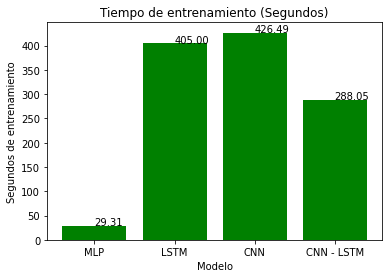

In [84]:
# Presentamos el tiempo de entrenamiento de cada modelo
values2 = [fin1, fin2, fin3, fin4]
models2 = ['MLP', 'LSTM', 'CNN', 'CNN - LSTM']

for index,data in enumerate(values2):
    plt.text(x=index , y =data+1 , s=f"{data:.2f}")
plt.title('Tiempo de entrenamiento (Segundos)')
plt.xlabel('Modelo')
plt.ylabel('Segundos de entrenamiento')
plt.bar(models2, values2, color='green')
    
print(f"Tiempo de entrenamiento MLP = {fin1:.2f}")
print(f"Tiempo de entrenamiento LSTM = {fin2:.2f}")
print(f"Tiempo de entrenamiento CNN = {fin3:.2f}")
print(f"Tiempo de entrenamiento CNN - LSTM = {fin4:.2f}")

In [85]:
# Matriz de confusión del primer modelo
pd.crosstab(pd.Series(y_test),
            pd.Series(preds1),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,843,4,16,21,8,3,96,0,9,0,1000
1,0,973,3,16,4,0,3,0,0,1,1000
2,13,0,779,12,107,1,87,0,1,0,1000
3,22,7,19,890,41,1,17,0,3,0,1000
4,1,0,76,23,838,0,60,0,1,1,1000
5,0,0,0,1,0,965,1,24,1,8,1000
6,133,1,58,30,61,0,712,1,4,0,1000
7,0,0,0,0,0,12,0,970,1,17,1000
8,2,0,7,3,7,4,8,5,963,1,1000


In [86]:
# Matriz de confusión del segundo modelo
pd.crosstab(pd.Series(y_test),
            pd.Series(preds2),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,804,1,12,21,2,1,151,0,8,0,1000
1,6,971,2,15,3,0,2,0,1,0,1000
2,15,1,781,15,71,1,112,0,4,0,1000
3,35,14,7,869,33,0,34,0,8,0,1000
4,2,1,88,38,770,2,96,0,3,0,1000
5,1,0,0,1,0,969,0,17,2,10,1000
6,117,1,41,29,60,0,735,0,17,0,1000
7,0,0,0,0,0,16,0,966,0,18,1000
8,7,0,2,5,4,4,3,2,973,0,1000


In [87]:
# Matriz de confusión del tercer modelo
pd.crosstab(pd.Series(y_test),
            pd.Series(preds4),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,855,1,20,27,2,1,87,0,7,0,1000
1,1,983,1,12,3,0,0,0,0,0,1000
2,19,2,880,9,45,0,45,0,0,0,1000
3,20,8,15,907,26,0,23,0,1,0,1000
4,1,5,86,25,845,0,38,0,0,0,1000
5,1,0,0,0,0,972,0,17,1,9,1000
6,131,2,71,30,96,0,663,0,7,0,1000
7,0,0,0,0,0,7,0,969,0,24,1000
8,5,2,1,4,3,2,3,2,977,1,1000


In [88]:
# Matriz de confusión del cuarto modelo
pd.crosstab(pd.Series(y_test),
            pd.Series(preds4),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,855,1,20,27,2,1,87,0,7,0,1000
1,1,983,1,12,3,0,0,0,0,0,1000
2,19,2,880,9,45,0,45,0,0,0,1000
3,20,8,15,907,26,0,23,0,1,0,1000
4,1,5,86,25,845,0,38,0,0,0,1000
5,1,0,0,0,0,972,0,17,1,9,1000
6,131,2,71,30,96,0,663,0,7,0,1000
7,0,0,0,0,0,7,0,969,0,24,1000
8,5,2,1,4,3,2,3,2,977,1,1000


In [89]:
# Clasificación del primer modelo
print(classification_report(preds1, y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1014
           1       0.97      0.99      0.98       985
           2       0.78      0.81      0.80       958
           3       0.89      0.89      0.89       996
           4       0.84      0.79      0.81      1066
           5       0.96      0.96      0.96      1004
           6       0.71      0.72      0.72       986
           7       0.97      0.93      0.95      1040
           8       0.96      0.98      0.97       983
           9       0.94      0.97      0.96       968

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [90]:
# Clasificación del segundo modelo
print(classification_report(preds2, y_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       988
           1       0.97      0.98      0.98       989
           2       0.78      0.84      0.81       933
           3       0.87      0.88      0.87       993
           4       0.77      0.82      0.79       943
           5       0.97      0.97      0.97       999
           6       0.73      0.65      0.69      1133
           7       0.97      0.95      0.96      1022
           8       0.97      0.96      0.97      1016
           9       0.96      0.97      0.96       984

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [91]:
# Clasificación del tercer modelo
print(classification_report(preds3, y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1070
           1       0.98      1.00      0.99       980
           2       0.91      0.86      0.88      1056
           3       0.92      0.92      0.92      1006
           4       0.91      0.85      0.88      1074
           5       0.99      0.98      0.99      1012
           6       0.68      0.84      0.75       809
           7       0.97      0.97      0.97      1010
           8       0.98      0.98      0.98      1001
           9       0.96      0.98      0.97       982

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



In [92]:
# Clasificación del cuarto modelo
print(classification_report(preds4, y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.98      0.98      0.98      1003
           2       0.88      0.82      0.85      1075
           3       0.91      0.89      0.90      1014
           4       0.84      0.83      0.84      1020
           5       0.97      0.98      0.98       988
           6       0.66      0.77      0.71       859
           7       0.97      0.96      0.97      1007
           8       0.98      0.98      0.98       994
           9       0.97      0.97      0.97      1007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



**Análisis de resultados**

Todos los tipos de redes alcanzaron una precisión similar en los datos de validación. La precisión de los modelos se encuentra en un rango entre 88% y 92%. La red neuronal de tipo MLP fué la que tuvo un peor desempeño, pero su entrenamiento fue 20 veces más rápido que el de las demás. Se podría sugerir agregar más "epochs" en el entrenamiento. Sin embargo, esto genera overfitting en el modelo y la precisión del modelo en los datos de evaluación empeora. El entrenamiento de la red neuronal LSTM tardo más que la red MLP, y sus resultados en los datos de evaluación mejoraron en menos de 0.5%. Por otro lado, la red neuronal convoluciónal obtuvo la mejor precisión en los datos de validación. Su tiempo de entrenamiento fue un poco más alto pero no cayo en overfitting. Finalmente, la red que tenía capas tipo CNN y LSTM, obtuvo mejores resultados que las redes MLP y LSTM, pero no alcanzó los resultados de la red CNN. La red CNN - LSTM tuvo un menor tiempo de entrenamiento que la red CNN. No obstante, si se incrementan los "epochs" la red cae en overfitting y su precisión no aumenta. 

Uno de los problemas por los cuales nuestros modelos solo llegaron a un máximo de entre 88% y 92% es que algunas de las prendas eran muy similares. Tal es el caso de las 'T-shirt' y las 'shirt', 'Coat' y 'Pullover' y en menor medida, 'Sneaker' y 'Ankle Boot'. Dado a que las imágenes son de (28x28) pierden un poco de calidad. Una mejor calidad podría hacer más identificables a estas prendas. El caso de las 'T-shirt' y las 'shirt' es el más relevante, dado que todos los modelos tienen peores métricas de evaluación al clasificar las 'Shirt', la categoría número 6, estas se pueden observar en los reportes de clasificación de cada uno de los modelos. Además, en las matrices de confusión se puede observar cómo es que al momento de clasificar las 'Shirt' se tienen muchos errores, no sólo con 'T-shirt', pero también los confunde con 'Pullover', 'Dress' y 'Coat', creemos que esto tiene que ver con la baja calidad de las imágenes y que la figura del 'Shirt' es génerica y parecida al de todas las categorrias anteriores. Más allá de las que son realmente muy parecidas, los modelos, sobre todo el CNN, clasifican bastante bien las imágenes sin llegar a un caso de overfitting.

**Selección de red y justificación**

La red que demostró tener mejores resultados fue la red neuronal convolucional (CNN). Este tipo de redes es capaz de identificar patrones en las imágenes, por lo que en esta tarea resulto ser muy buena. Tomó un buen tiempo de entrenamiento pero no cayó en overfitting. Obtuvo mejores resultados que la red con capas CNN y LSTM. Consideramos que la red LSTM no fue tan apta para esta tarea como la CNN por sí sola. 

## Implementación con nuevos datos

**Nuevos datos**

Se implementará el modelo con una nueva base de datos. En este caso se utilizará la base de datos MNIST, se encuentra disponible en http://yann.lecun.com/exdb/mnist/. Esta base de datos consiste en imágenes de 28x28 de dígitos escritos a mano. Al igual que la base de datos anterior, MNIST cuenta con 60,000 registros de entrenamiento y 10,000 registros de validación. Se implementará la misma estructura que en el modelo CNN y se entrenará con los nuevos datos. Posteriormente, se evaluará el desempeño del modelo con este set de datos. 

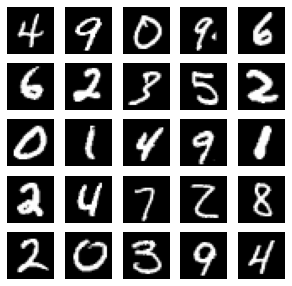

In [93]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
   plt.subplot(5, 5, i + 1)
   image = images[i]
   plt.imshow(image, cmap='gray')
   plt.axis('off')
plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

In [94]:
# Cargamos nuevos datos
(x_trainF, y_trainF), (x_testF, y_testF) = mnist.load_data()

# Normalizamos los valores
x_trainF = x_trainF.astype('float32') / 255
x_testF = x_testF.astype('float32') / 255

# Ajustamos los datos de entrenamiento para los modelos convolucionales 
x_trainF = x_trainF.reshape(x_trainF.shape[0], 28, 28, 1)
x_testF = x_testF.reshape(x_testF.shape[0], 28, 28, 1)

In [95]:
# Definimos el modelo
modelFin = keras.Sequential()

# Agregamos las capas
modelFin.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
modelFin.add(MaxPooling2D(2,2))

modelFin.add(Conv2D(64, (3,3), activation='relu'))
modelFin.add(MaxPooling2D(2,2))

modelFin.add(Dropout(0.3))
modelFin.add(Flatten())

modelFin.add(Dense(50, activation="relu"))
modelFin.add(Dense(10, activation="softmax"))

# Compilamos el modelo
modelFin.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Mostramos un resúmen del modelo
modelFin.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 1600)             

In [96]:
# Mostramos la estructura de la red
# SVG(model_to_dot(modelFin, show_shapes= True, show_layer_names=False, dpi=65).create(prog='dot', format='svg'))

In [97]:
# Entrenamos el modelo
startFin = time()
historyFin = modelFin.fit(x_trainF, y_trainF, batch_size=80, epochs=20, verbose=0)
finFin = time()-startFin
print(f"Tiempo de entrenamiento: {finFin:.2f} segundos")

Tiempo de entrenamiento: 1109.03 segundos


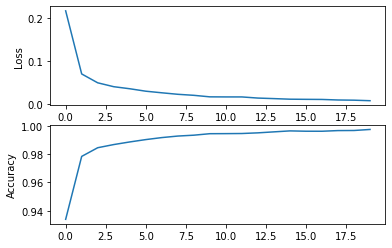

In [98]:
# Mostramos el desempeño del modelo
_, axs = plt.subplots(2, 1)
axs[0].plot(historyFin.history['loss'])
axs[0].set_ylabel(r"Loss")
axs[1].plot(historyFin.history['accuracy'])
axs[1].set_ylabel(r"Accuracy")
plt.show()

In [99]:
# Mostramos la presición del modelo
lossFin, accuracyFin = modelFin.evaluate(x_testF, y_testF)
print(f"Accuracy = {accuracyFin*100:.2f} %")

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy = 99.40 %


In [100]:
# Prediction
probsF = modelFin.predict(x_testF)
predsF = probsF.argmax(axis=1)

pd.crosstab(pd.Series(y_testF),
            pd.Series(predsF),
            rownames=['Actual'],
            colnames=['Predicted'],
            margins=True)

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,976,0,1,0,0,0,2,1,0,0,980
1,0,1133,1,1,0,0,0,0,0,0,1135
2,0,0,1029,0,0,0,1,2,0,0,1032
3,0,0,2,1004,0,2,0,0,2,0,1010
4,0,0,1,0,976,0,1,1,0,3,982
5,1,0,0,3,0,887,1,0,0,0,892
6,2,1,0,0,1,1,953,0,0,0,958
7,0,2,2,0,0,0,0,1024,0,0,1028
8,2,0,1,1,0,1,1,0,966,2,974


**Análisis y discusión sobre resultados**

El modelo demostró tener un muy buen rendimiento con esta base de datos. En el conjunto de datos de validación, el modelo tuvo una presición del 99.40%. Después de revisar la matriz de confusión, pudimos identificar el tipo de errores que tuvo el modelo. La mayor cantidad de predicciones erroneas sucedieron cuando el modelo predijo la imágen de un 9 como un 4. Otros pares de números que confunió el modelo fueron el 9 y 7, 9 y 8, 7 y 5 Es entendible el tipo de errores que tuvo el modelo. Los números que se confundieron con mayor frecuencia, pueden llegar a ser números muy parecidos cuando son escritos a mano. 

## Conclusiones 

En este proyecto se implementó una serie de redes neuronales diferentes para clasificar prendas de ropa en imágenes de 28x28. Se implementaron redes neuronales MLP, LSTM, CNN y una red que contaba con capas CNN y LSTM. En general los modelos obtuvieron una precisión similar en datos de validación, pero el que tuvo un mejor desempeño fue el CNN, con una presición de al rededor del 92%. Posteriormente, se entrenó el mismo modelo con un set de datos de números escritos a mano, y se obtuvo una precisión del 99%. A partir de esto se pueden obtener varias conclusiones. 

Consideramos que el modelo tuvo un mejor rendimiento con el set de datos de dígitos que en el set de datos de ropa porque las imágenes de las prendas eran más complejas que las imágenes de dígitos. Las imágenes de prendas de ropa tienen más detalles y una mayor variación entre los registros de la misma característica. Al ser una red neuronal convolucional, ciertas capas se enfocan en reconocer patrones dentro de las imágenes. La red tiene que identificar una mayor cantidad de patrones en las imágenes de ropa que en las imágenes de dígitos. Se puede decir que a la red le cuesta más trabajo identificar y recordar los patrones de las imágenes de las prendas de ropa que de las de dígitos. 

Consideramos que el modelo podría tener varias posibles mejoras. En general dichas mejoras tienen que ver más con los datos que con el modelo, dado que la calidad del modelo depende de la calidad y cantidad de los datos con los que fue entrenado. El modelo mejoraría si las imágenes tuvieran una mejor definición. De esta forma, se podrían identificar más detalles de las prendas como texturas en la tela. También, se podrían agregar imágenes con las prendas posicionadas de forma diferente y de tamaños diferentes, así como imágenes a color. Otra posible mejora sería implementar modelos más complejos. Es decir que tengan más capas y nodos. Para poder hacer esto, se debería contar con un set de datos mucho más grande para que los modelos no caigan en overfitting. El problema con todas estas propuestas es que el tiempo de entrenamiento de los modelos incrementaría de forma considerable, y esto depende de la capacidad computacional donde se lleve a cabo. A su vez, esto se podría solucionar utilizando servidores en la nube con mayor capacidad computacional.   

## Reflexiones

**Ian:**
Hoy en día la inteligencia artificial forma parte de nuestra vida cotidiana, la usamos en los celulares inteligentes, en mapas, en recomendaciones de contenido en redes, etc. Considero que es una herramienta muy poderosa, y por eso es importante utilizarla con cuidado y responsabilidad. Durante este curso se ha abierto mucho mi perspectiva sobre las redes neutronales y la inteligencia artificial. He aprendido sobre las diferentes tareas que puede llevar a cabo una red neuronal y los desafíos a los que todavía se enfrenta la inteligencia artificial. He podido entender los diferentes tipos y arquitecturas de redes neuronales, y por qué algunas son mejores para ciertas tareas en específico. Creo que es importante entender los fundamentos de las redes neuronales para poder sugerir e implementar mejoras en los modelos. Después de entender sobre el funcionamiento y los tipos de redes, pudimos implementar algunos tipos diferentes de redes neuronales. Estas redes por lo general no eran muy complejas y no operaban con mucha información, pero estos conocimientos son escalables si contamos con más información, más tiempo, o más capacidad computacional. 

Este curso me dejo con mucha más curiosidad sobre el tema que con la que llegué. Me interesa seguir aprendiendo del tema y desarrollar las habilidades necesarias para implementar distintos tipos de redes neuronales y poder llevar a cabo más tareas por medio de inteligencia artificial. Considero que es importante reflexionar y ser conscientes sobre las implicaciones del desarrollo de la inteligencia artificial, sobre todo cuando la vida de las personas se encuentra de por medio. 

**Roel:**
A lo largo de esta materia he aprendido un poco sobre el poder que la inteligencia artifical tiene y me ha asombrado bastante. Con ella se puede hacer prácticamente todo si es que tenemos la inteligencia, creatividad y compromiso para utilizarla. Tiene el potencial para salvar miles de vidas, ya sea con modelos que detecten enfermedad en las etapas más previas, que clasifiquen celulas cancerosas, detecten cuando algún automovilista se este quedando dormido, entre muchas otras cosas. Sin embargo no creo que esta sea una herramienta todapoderosa, tiene algunos defectos. Uno de ellos es que los modelos solo son tan buenos como los datos con los que son entrenados. Es decir, si se tiene un buen modelo, pero los datos con los que se entrenen se encuentran sesgados, esto no sería un verdadero reflejo de la realidad. Uno de los problemas que podrían ocurrir, por ejemplo es un modelo que diga cuando alguna persona ha cometido un crimen o no, si se vive en una sociedad racista o clasista, estos modelos aprenderían a ser clasistas y racistas también. Es por ello que considero que antes de implementar un modelo para solucionar un problema se debe de planear y ejecutar cuidadosamente para asegurar que se tengan resultados éticos.

## Fuentes

- Redes Neuronales convolucionales son UN Tipo de Redes Neuronales. Juan Barrios. (2019, June 18). Retrieved November 25, 2021, from https://www.juanbarrios.com/redes-neurales-convolucionales/. 

- Redes Neuronales Recurrentes. Jordi TORRES.AI. (2021, March 22). Retrieved November 25, 2021, from https://torres.ai/redes-neuronales-recurrentes/. 

- Sotaquirá, M. (n.d.). ¿Qué son las redes LSTM? Codificando Bits. Retrieved November 25, 2021, from https://www.codificandobits.com/blog/redes-lstm/. 

- YouTube. (2021). YouTube. Retrieved November 25, 2021, from https://www.youtube.com/watch?v=4sWhhQwHqug&amp;t=1221s. 